<a href="https://colab.research.google.com/github/yelsinhc2025/PROGRANACION-102/blob/main/3_hill_climbing_dna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DNA fragment assembly

> Add blockquote



Download distances. this file contains distances between fragments. It was computed using smith waterman algorithm.

In [ ]:
import gdown
file_id = "1KLq8XJCkw5QNwFX5hmkMcogZrlikFYSi"
output_file = "distances.dat"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)

In [ ]:
import numpy as np
matrix = np.genfromtxt('distances.dat', delimiter=',')
matrix
matrix.shape

(39, 39)

In [ ]:
def fitness(sol): # depende del problema
  distance = 0
  for i in range(len(sol)-1):
    distance += matrix[sol[i]][sol[i+1]]
  return distance



def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range(i + 1, len(sol)):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)

  return neighbors



In [ ]:
import numpy as np
current_solution = np.array(range(matrix.shape[0])) # [0,1,2,3,4,5, .... 38]
np.random.shuffle(current_solution)

def hill_climbing(sol):
  while True:
    neighbors = get_neighbors(sol)
    best_neighbor = max(neighbors, key=fitness)


    if fitness(best_neighbor) > fitness(sol):
      sol = best_neighbor
    else:
      return sol

print(hill_climbing(current_solution))

[ 6 26 24 19 21 30 36 27 13 25  3 10 15 16 18  2 31 37 32 35  4 17 22  8
  7  1  0 33  9 38 29  5 12 23 34 20 14 28 11]


In [ ]:

t_min = 3
t_max = 100
cooling_rate = 0.00001


T =  t_max
while T  > t_min:
  print()

  # ...
  T = T * cooling_rate

# Plotting


Ejemplo de como visualizar los nodos

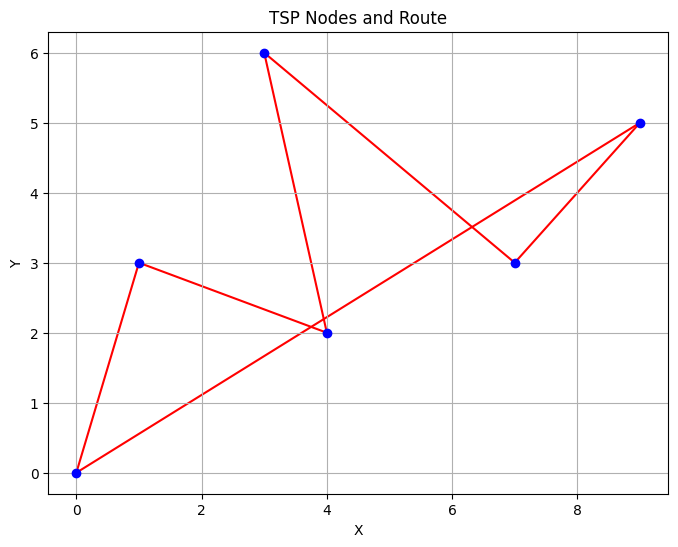

In [ ]:
def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

# Example usage:
nodes = [(0, 0), (1, 3), (4, 2), (3, 6), (7, 3), (9, 5)]  # Coordinates of nodes
route = [0, 1, 2, 3, 4, 5]  # Example TSP route (indices of nodes)

plot_tsp(nodes, route)

Ejemplo de hill climbing con visualización de los nodos

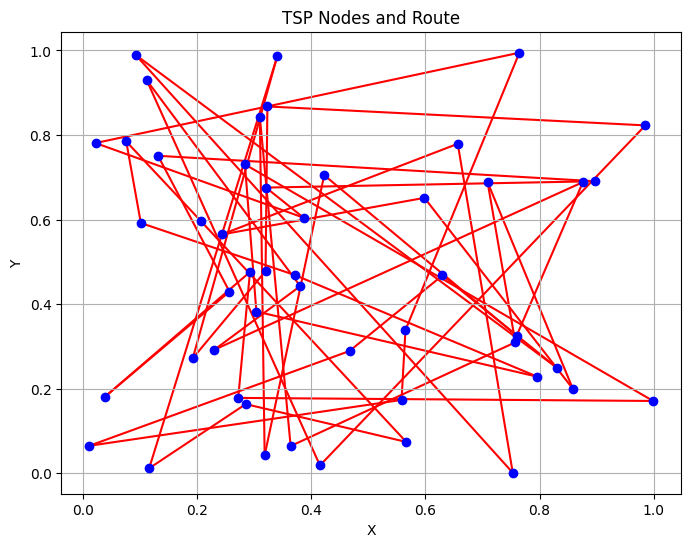

iteration: [32 21 43 30 39 17  5 10 18 25  2 36 48  1 23 11 35 37  6 46 14 15 24 47
 34 49 27 29 45 20  0  9 41  8 33  3 12  7 40 42 38 13 26 31 28  4 44 16
 22 19]
iteration: [32 21 43 30 39 17  5 10 18 37  2 36 48  1 23 11 35 25  6 46 14 15 24 47
 34 49 27 29 45 20  0  9 41  8 33  3 12  7 40 42 38 13 26 31 28  4 44 16
 22 19]
iteration: [32 21 43 30 39 17  5 10 18 37  2 36 48  1 23 11 35 25  6 46 14 15 24 47
 34 49 31 29 45 20  0  9 41  8 33  3 12  7 40 42 38 13 26 27 28  4 44 16
 22 19]
iteration: [32 21 43 30 26 17  5 10 18 37  2 36 48  1 23 11 35 25  6 46 14 15 24 47
 34 49 31 29 45 20  0  9 41  8 33  3 12  7 40 42 38 13 39 27 28  4 44 16
 22 19]
iteration: [32 21 43 30 26 17  5 10 18 37  2 36 48  1 23 11 35 25  6 46 14 15 24  7
 34 49 31 29 45 20  0  9 41  8 33  3 12 47 40 42 38 13 39 27 28  4 44 16
 22 19]
iteration: [32 21 43 30 26 17  5 10 18 37  2 36 48  1 14 11 35 25  6 46 23 15 24  7
 34 49 31 29 45 20  0  9 41  8 33  3 12 47 40 42 38 13 39 27 28  4 44 16
 22 19]
iteration:

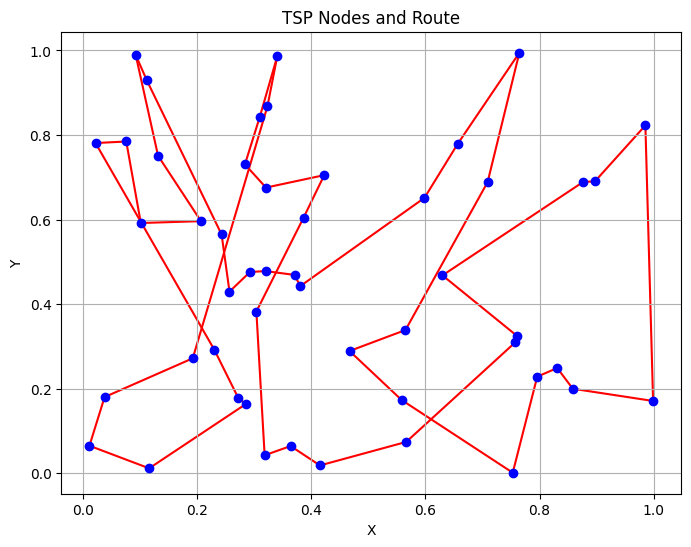

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

N = 50
positions = np.random.rand(N, 2)
distances = squareform(pdist(positions, 'euclidean'))
#print(positions)
#print(distances)


# step 1  # solution aleatoria
current_solution = np.array(list(range(N)))
np.random.shuffle(current_solution)


plot_tsp(positions, current_solution)

def fitness(sol): # depende del problema
  distance = 0
  for i in range(len(sol)-1):
    distance += distances[sol[i]][sol[i+1]]
  return distance

def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range(i + 1, len(sol)):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)

  return neighbors

def hill_climbing(sol):
  while True:
    #print("iteration:", sol)
    neighbors = get_neighbors(sol)
    best_neighbor = min(neighbors, key=fitness)

    if fitness(best_neighbor) < fitness(sol):
      sol = best_neighbor
    else:
      return sol

solution = hill_climbing(current_solution)
plot_tsp(positions, solution)